# Kasra Tookallo


# Data Analysis



## Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


## Data Visualisation

<div dir="rtl">
توضیحات:
<ul>
<li>نام شهر</li>
<li>طول جغرافیایی(شرقی + ، غربی -)</li>
<li>عرض جغرافیایی(شمالی + ، جنوبی -) </li>
<li>جمعیت</li>

</ul>
</div>

## Raw Data


In [18]:
Tehran = pd.array([{"longitude": [51, 23]}, {"lattitude": [35, 41]}, {"population": 9_039_000}])
Mashhad = pd.array([{"longitude": [59, 32]}, {"lattitude": [36, 19 ]}, {"population": 3_002_000}])
Esfahan = pd.array([{"longitude": [51, 40]}, {"lattitude": [32, 38 ]}, {"population": 1_961_000}])
Karaj = pd.array([{"longitude": [50, 59]}, {"lattitude": [35, 49 ]}, {"population": 1_592_000}])
Shiraz = pd.array([{"longitude": [52, 32]}, {"lattitude": [29, 37 ]}, {"population": 1_565_000}])
Tabriz = pd.array([{"longitude": [46, 17]}, {"lattitude": [37, 4 ]}, {"population": 1_558_000}])
Qom = pd.array([{"longitude": [50, 52]}, {"lattitude": [34, 38 ]}, {"population": 1_201_000}])
Ahvaz = pd.array([{"longitude": [48, 41]}, {"lattitude": [31, 19 ]}, {"population": 1_184_000}])
Kermanshah = pd.array([{"longitude": [47, 4]}, {"lattitude": [34,19 ]}, {"population": 946_000}])
Orumieh = pd.array([{"longitude": [45,4]}, {"lattitude": [37, 32 ]}, {"population": 736_000}])


### Data Cleaning


In [19]:
data = [
    {"city": "Tehran", "longitude": [51, 23], "latitude": [35, 41], "population": 9_039_000},
    {"city": "Mashhad", "longitude": [59, 32], "latitude": [36, 19], "population": 3_002_000},
    {"city": "Esfahan", "longitude": [51, 40], "latitude": [32, 38], "population": 1_961_000},
    {"city": "Karaj", "longitude": [50, 59], "latitude": [35, 49], "population": 1_592_000},
    {"city": "Shiraz", "longitude": [52, 32], "latitude": [29, 37], "population": 1_565_000},
    {"city": "Tabriz", "longitude": [46, 17], "latitude": [37, 4], "population": 1_558_000},
    {"city": "Qom", "longitude": [50, 52], "latitude": [34, 38], "population": 1_201_000},
    {"city": "Ahvaz", "longitude": [48, 41], "latitude": [31, 19], "population": 1_184_000},
    {"city": "Kermanshah", "longitude": [47, 4], "latitude": [34, 19], "population": 946_000},
    {"city": "Orumieh", "longitude": [45, 4], "latitude": [37, 32], "population": 736_000}
]
data

[{'city': 'Tehran',
  'longitude': [51, 23],
  'latitude': [35, 41],
  'population': 9039000},
 {'city': 'Mashhad',
  'longitude': [59, 32],
  'latitude': [36, 19],
  'population': 3002000},
 {'city': 'Esfahan',
  'longitude': [51, 40],
  'latitude': [32, 38],
  'population': 1961000},
 {'city': 'Karaj',
  'longitude': [50, 59],
  'latitude': [35, 49],
  'population': 1592000},
 {'city': 'Shiraz',
  'longitude': [52, 32],
  'latitude': [29, 37],
  'population': 1565000},
 {'city': 'Tabriz',
  'longitude': [46, 17],
  'latitude': [37, 4],
  'population': 1558000},
 {'city': 'Qom',
  'longitude': [50, 52],
  'latitude': [34, 38],
  'population': 1201000},
 {'city': 'Ahvaz',
  'longitude': [48, 41],
  'latitude': [31, 19],
  'population': 1184000},
 {'city': 'Kermanshah',
  'longitude': [47, 4],
  'latitude': [34, 19],
  'population': 946000},
 {'city': 'Orumieh',
  'longitude': [45, 4],
  'latitude': [37, 32],
  'population': 736000}]

## Organized Data

In [20]:
data = {
    "City": ["Tehran", "Mashhad", "Esfahan", "Karaj", "Shiraz", "Tabriz", "Qom", "Ahvaz", "Kermanshah", "Orumieh"],
    "Longitude_Deg": [51, 59, 51, 50, 52, 46, 50, 48, 47, 45],
    "Longitude_Min": [23, 32, 40, 59, 32, 17, 52, 41, 4, 4],
    "Latitude_Deg": [35, 36, 32, 35, 29, 37, 34, 31, 34, 37],
    "Latitude_Min": [41, 19, 38, 49, 37, 4, 38, 19, 19, 32],
    "Population": [9039000, 3002000, 1961000, 1592000, 1565000, 1558000, 1201000, 1184000, 946000, 736000]
}
df = pd.DataFrame(data)
df


,City,Longitude_Deg,Longitude_Min,Latitude_Deg,Latitude_Min,Population
0,Tehran,51,23,35,41,9039000
1,Mashhad,59,32,36,19,3002000
2,Esfahan,51,40,32,38,1961000
3,Karaj,50,59,35,49,1592000
4,Shiraz,52,32,29,37,1565000
5,Tabriz,46,17,37,4,1558000
6,Qom,50,52,34,38,1201000
7,Ahvaz,48,41,31,19,1184000
8,Kermanshah,47,4,34,19,946000
9,Orumieh,45,4,37,32,736000


### Data Scaling

In [21]:
# تبدیل درجه و دقیقه به درجه اعشاری (ثانیه = 0)
# convert Longitude and Latitude to X,y
def dms_to_decimal(d, m, s=0):
    return d + m / 60.0 + s / 3600.0
rows = []
for row in data:
    lon_dec = dms_to_decimal(df['Longitude_Deg'], df['Longitude_Min'])
    lat_dec = dms_to_decimal(df['Latitude_Deg'], df['Latitude_Min'])
    rows.append({
        "city": df["City"],
        "lon": lon_dec,
        "lat": lat_dec,
        "population": df["Population"]
    })
rows = {
    "City": ["Tehran", "Mashhad", "Esfahan", "Karaj", "Shiraz", "Tabriz", "Qom", "Ahvaz", "Kermanshah", "Orumieh"],
    "Longitude": [51.383333, 59.533333, 51.666667, 50.983333, 52.533333, 46.283333, 50.866667, 48.683333, 47.066667, 45.066667],
    "Latitude": [35.683333, 36.316667, 32.633333, 35.816667, 29.616667, 37.066667, 34.633333, 31.316667, 34.316667, 37.533333,],
    "Population": [9039000, 3002000, 1961000, 1592000, 1565000, 1558000, 1201000, 1184000, 946000, 736000]
}
df = pd.DataFrame(rows)
df

,City,Longitude,Latitude,Population
0,Tehran,51.383333,35.683333,9039000
1,Mashhad,59.533333,36.316667,3002000
2,Esfahan,51.666667,32.633333,1961000
3,Karaj,50.983333,35.816667,1592000
4,Shiraz,52.533333,29.616667,1565000
5,Tabriz,46.283333,37.066667,1558000
6,Qom,50.866667,34.633333,1201000
7,Ahvaz,48.683333,31.316667,1184000
8,Kermanshah,47.066667,34.316667,946000
9,Orumieh,45.066667,37.533333,736000


In [22]:
cities = np.array(rows["City"])
lons = np.array(rows["Longitude"])
lats = np.array(rows["Latitude"])
pops = np.array(rows["Population"])
print(cities)
print(lons)
print(lats)
print(pops)

['Tehran' 'Mashhad' 'Esfahan' 'Karaj' 'Shiraz' 'Tabriz' 'Qom' 'Ahvaz'
 'Kermanshah' 'Orumieh']
[51.383333 59.533333 51.666667 50.983333 52.533333 46.283333 50.866667
 48.683333 47.066667 45.066667]
[35.683333 36.316667 32.633333 35.816667 29.616667 37.066667 34.633333
 31.316667 34.316667 37.533333]
[9039000 3002000 1961000 1592000 1565000 1558000 1201000 1184000  946000
  736000]


In [23]:
# Conver longitudes and latitudes to readable x,y
x, y = m(lons, lats)

## Representation

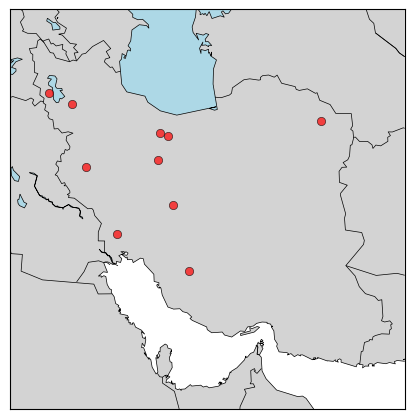

In [24]:
# create Map of Iran
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# # setup mercator map projection.
m = Basemap(llcrnrlon=43., llcrnrlat=23.,
            urcrnrlon=64., urcrnrlat=41,
            rsphere=(6378137.00, 6356752.3142),
            resolution='l', projection='merc',
            lat_0=40., lon_0=-20., lat_ts=20.)

# Separating Boundaries of the Map
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawcountries(linewidth=0.5)

# draw x,y on the basic map
scatter = m.scatter(x, y,  c='red', alpha=0.7, edgecolors='black', linewidth=0.5, zorder=5)


# todo (https://matplotlib.org/basemap/stable/users/examples.html#) simply has commanded this Map
